Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---
#


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict? X 
- [ ] Is your problem regression or classification? Classification X 
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced? Yes, the classes are imbalanced
    
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [726]:
#library versions
!pip install -U scikit-learn
!python -m pip show scikit-learn


Requirement already up-to-date: scikit-learn in /Users/johnrivera/.virtualenvs/jupyter/lib/python3.7/site-packages (0.23.1)
Name: scikit-learn
Version: 0.23.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /Users/johnrivera/.virtualenvs/jupyter/lib/python3.7/site-packages
Requires: threadpoolctl, scipy, numpy, joblib
Required-by: sklearn, category-encoders


In [727]:
#instantiate classes

In [728]:
#importing data
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/JonRivera/JonRivera.github.io/master/Unit2/Buil_Week/Data_Sets/Hotel_Bookings/hotel_bookings.csv")

In [729]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [731]:

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [732]:

def wrangle(df):
    df = df.copy()
    #drop unecessary columns, or columns that seem to have little impact on target
    df = df.drop(['company', 'agent','arrival_date_week_number'],axis = 1)
    df = df.dropna(axis=0)  
    #set date column to index
    #doesn't add any substantial info, and has high cardinality. 
    #arrivate_date year,month, day already include this info ..
    df.set_index(pd.to_datetime(df['reservation_status_date']), inplace = True)
    df = df.drop(['reservation_status_date'], axis=1)
    #df['reservation_status'] =  df['reservation_status'].replace({'No-Show':'Canceled'})
    return df
df = wrangle(df)


#predicting wheather a hotel will experience cancellations or not
#goal: make an app hotels can use to determine wheather or not they will experience cancellations


In [733]:
#get train, validate,and test subsets
train = df[df['arrival_date_year']==2015].copy()
val = df[df['arrival_date_year']==2016].copy()
test = df[df['arrival_date_year'] == 2017].copy()
train.shape, val.shape, test.shape

((21859, 28), (56435, 28), (40604, 28))

In [734]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2015-07-01,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
2015-07-01,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2015-07-02,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
2015-07-02,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
2015-07-03,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [735]:
train.describe(exclude='number')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,21859,21859,21859,21859,21859,21859,21859,21859,21859,21859,21859
unique,2,6,5,98,6,5,9,11,3,4,3
top,City Hotel,September,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,13663,5084,17106,13303,6148,17691,17614,14376,18202,11319,13753


In [736]:
#feature selection
# is_canceled is also a target vector, reveals reservation_status implicitly ... is leaking information of target
def features_select(df):    
    target = 'reservation_status'
    #creating subsets of features, splitted between numerical and categorical
    train_features =  df.drop(columns = [target, 'is_canceled'],axis =1)
    numeric_features = train_features.select_dtypes(include='number').columns.tolist()
    cardinality = train_features.select_dtypes(exclude = 'number').nunique()
    categorical_features = cardinality.index.tolist()
    #combine lists to extrapolate features of interest
    features = numeric_features + categorical_features
    return features
features = features_select(df)
features

['lead_time',
 'arrival_date_year',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [737]:
#def feature_engineering(X):

In [738]:
#seperating X matrices and correspind y vectors
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
X_val= val[features]
y_val = val[target]
X_train.shape,y_train.shape,X_val.shape, y_val.shape

((21859, 26), (21859,), (56435, 26), (56435,))

In [739]:
#baselines
y_train.value_counts(normalize=True)


Check-Out    0.629169
Canceled     0.362231
No-Show      0.008601
Name: reservation_status, dtype: float64

In [740]:
y_val.value_counts(normalize=True)


Check-Out    0.640064
Canceled     0.348117
No-Show      0.011819
Name: reservation_status, dtype: float64

In [741]:
y_train.value_counts()

Check-Out    13753
Canceled      7918
No-Show        188
Name: reservation_status, dtype: int64

In [742]:
type(y_train)

pandas.core.series.Series

In [743]:
# we only have 188 samples so lets increase to an arbitrary amount to see if we can improve
#accuracy and precision
#were going to upsample to do this
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)


In [744]:
minority_class = X[y_train=='No-Show']
minority_class

,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
reservation_status_date,,,,,,,,,,,,,,,,,,,,,
2015-07-04,36,2015,4,0,1,1,0.0,0,0,0,...,July,BB,PRT,Direct,Direct,E,G,No Deposit,Transient,No-Show
2015-07-12,55,2015,12,4,10,2,10.0,0,0,0,...,July,BB,PRT,Offline TA/TO,TA/TO,D,D,No Deposit,Contract,No-Show
2015-07-12,47,2015,12,2,3,2,0.0,0,0,0,...,July,BB,PRT,Online TA,TA/TO,F,F,No Deposit,Transient,No-Show
2015-07-17,6,2015,17,0,2,2,0.0,0,0,0,...,July,BB,PRT,Online TA,TA/TO,A,C,No Deposit,Transient,No-Show
2015-07-17,3,2015,17,0,2,1,0.0,0,0,0,...,July,BB,PRT,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,No-Show
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,24,2015,27,2,1,2,0.0,0,0,0,...,December,BB,PRT,Offline TA/TO,TA/TO,A,D,No Deposit,Transient,No-Show
2015-12-27,1,2015,27,2,4,2,0.0,0,0,0,...,December,BB,PRT,Direct,Direct,E,E,No Deposit,Transient,No-Show
2015-12-29,66,2015,29,0,5,2,2.0,0,0,0,...,December,BB,PRT,Online TA,TA/TO,F,F,No Deposit,Transient,No-Show


In [745]:
majority_class = X[(y_train=='Canceled') | (y_train == 'Check-Out')]


In [746]:
from sklearn.utils import resample
upampled_min_class = resample(minority_class,
                          replace=True, # sample with replacement
                          n_samples= 1000, # match number in majority class
                          random_state=42) # reproducible results

upsampled = pd.concat([majority_class, upampled_min_class])
upsampled['reservation_status'].value_counts()

Check-Out    13753
Canceled      7918
No-Show       1000
Name: reservation_status, dtype: int64

In [747]:
y_train = upsampled.reservation_status
X_train = upsampled.drop('reservation_status', axis=1)

In [748]:
y_train.value_counts()

Check-Out    13753
Canceled      7918
No-Show       1000
Name: reservation_status, dtype: int64

In [749]:
#instantitate classes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV

In [750]:
#identify hyper parameters before research cv
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [751]:
#Build pipeline using RadnomSearchCV
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# pipeline = make_pipeline(
#     ce.OrdinalEncoder(),
#     SimpleImputer(strategy='mean'),
#     RandomForestClassifier(n_jobs = -1, random_state=40)

# )

# param_distributions = { 
#     'randomforestclassifier__n_estimators': [100]
#     'randomforestclassifier__criterion': ['gini', 'entropy'],
#     'randomforestclassifier__max_features': [5,10,20],
#     'randomforestclassifier__min_samples_split': [5,10,15,20],
#     'randomforestclassifier__min_samples_leaf': [2]
# }
# search = RandomizedSearchCV(
#     pipeline, 
#     param_distributions = param_distributions,
#     n_iter = 10,
#     cv=10,
#     scoring ='accuracy',
#     verbose = 1,
#     return_train_score = True,
#     n_jobs = -1
# )

# search.fit(X_train, y_train)
# print('Cross-validation Best Score', search.best_score_)
# print('Best Estimator:' ,search.best_params_)
# print('Best Model', search.best_estimator_)

In [752]:
 model = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1, n_estimators = 100,random_state=40)

)
model.fit(X_train,y_train)


Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['hotel', 'arrival_date_month', 'meal',
                                      'country', 'market_segment',
                                      'distribution_channel',
                                      'reserved_room_type',
                                      'assigned_room_type', 'deposit_type',
                                      'customer_type'],
                                mapping=[{'col': 'hotel',
                                          'data_type': dtype('O'),
                                          'mapping': Resort Hotel    1
City Hotel      2
NaN            -2
dtype: int64},
                                         {'col': 'arrival_date_month',
                                          'data_type...
NaN    -2
dtype: int64},
                                         {'col': 'deposit_type',
                                          'data_type': dtype('O'),
                                    

Evaluation Metrics

In [753]:
print('Training Accuracy:', model.score(X_train, y_train))
print('Validation Accuracy:',model.score(X_val, y_val))


Training Accuracy: 0.9920162321909047
Validation Accuracy: 0.773013201027731


In [754]:
from sklearn.metrics import roc_auc_score
# The roc auc score  is telling us that the model does an ok job at ranking 
# True positive out puts, in this case it's check out
#however looking at the confusion matrix we can see the minority class
#
y_pred_probab = model.predict_proba(X_val)
roc_auc_score(y_val,y_pred_probab, multi_class = 'ovo',average='weighted')


0.7347381036676712

In [755]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

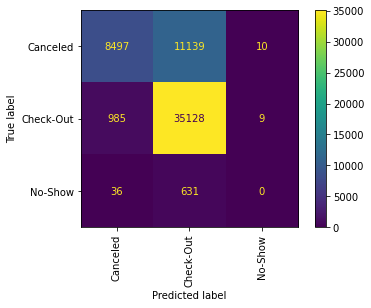

In [756]:
#From the confusion matrix we can see the model doesn't do a good job at classifying the minority class.
plot_confusion_matrix(model, X_val, y_val, values_format='.0f', xticks_rotation='vertical');

In [757]:
y_pred = model.predict(X_train)

In [758]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

    Canceled       0.99      0.99      0.99      7918
   Check-Out       0.99      0.99      0.99     13753
     No-Show       0.98      1.00      0.99      1000

    accuracy                           0.99     22671
   macro avg       0.99      0.99      0.99     22671
weighted avg       0.99      0.99      0.99     22671



In [759]:
print(f"train_precision:,{precision_score(y_train, y_pred, average = 'weighted')}")
print(f"train_recall:,{recall_score(y_train,y_pred, average = 'weighted')}")

train_precision:,0.9920315811628642
train_recall:,0.9920162321909047


In [760]:
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

    Canceled       0.89      0.43      0.58     19646
   Check-Out       0.75      0.97      0.85     36122
     No-Show       0.00      0.00      0.00       667

    accuracy                           0.77     56435
   macro avg       0.55      0.47      0.48     56435
weighted avg       0.79      0.77      0.74     56435



In [761]:
print(f"val_precision:, {precision_score(y_val,y_pred, average = 'weighted')}")
print(f"val_recall:, {recall_score(y_val,y_pred, average = 'weighted')}")

val_precision:, 0.7902014673316549
val_recall:, 0.773013201027731


In [762]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
# Binarize the output
y_train = label_binarize(y_train, classes=['Check-Out' , 'Canceled', 'No-Show'])
y_test = label_binarize(y_test, classes=['Check-Out' , 'Canceled', 'No-Show'])
y_val = label_binarize(y_val, classes=['Check-Out' , 'Canceled', 'No-Show'])
n_classes = y_train.shape[1]
y_train, n_classes

(array([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]]),
 3)

In [779]:

classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_val)
y_score

array([[0.98      , 0.        , 0.        ],
       [0.97      , 0.02      , 0.        ],
       [0.75333333, 0.28      , 0.09      ],
       ...,
       [0.98      , 0.04      , 0.01      ],
       [0.91      , 0.03      , 0.04      ],
       [0.91      , 0.03      , 0.04      ]])

In [781]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



In [782]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

/Users/johnrivera/.virtualenvs/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


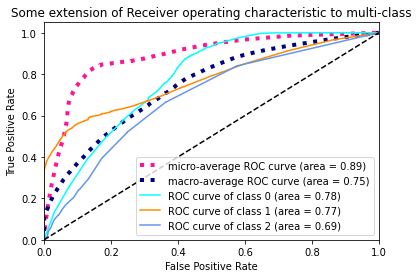

In [783]:
#code sckeleton built based on scikits examples in documentation
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [786]:
print(macro_roc_auc_ovr)

0.7466847786365384
